# This is a template JupyterNotebook.  You will not turn this in for grading, but it provides much template Python code that you will find useful.  If you like JupyterNotebooks then use this as the starting point for all of your later analysis work.  If not, you can copy the necessary code bits out to Spyder or your favorite environment.  You must actively record what you do during lab periods in your OneNote notebook!

## Dr. McLane's code template from Modern Lab.  This will not execute in a meaningful way in this notebook, but use it as a reference.

In [ ]:

###### IMPORTANT #########

#This code does not run as-is. It is used as a repository for how to do
#many things you might be interested in doing for this class, it is not the only
#way to do these things (or neccesarily the best)k just a good starting place



#import numpy to handle arrays
import numpy as np

#import matplotlib to create plots
import matplotlib.pyplot as plt

#allows for curve fitting
import scipy.optimize as opt;

#import data. assumes comments are # are data is separated by white space
#the unpack is required to read in vertical data arrayss

xdata,ydata, yerror = np.loadtxt('extension-data.txt' ,unpack=True)



#the function we are fitting, called func. You can create whatver you want

def func(x,a,b):
    return a*x+b


#The code below is useful for creating arrays that are smaller parts of 
# Larger arrays.  EXTREMELY useful for when you only want to fit part of your data
q = np.array([1,2,3,4,5,6])
p = np.array([9,8,7,2,1,0])

qnew=q[np.where( (q>2.5) & (q<4.5) )]
pnew=p[np.where( (q>2.5) & (q<4.5) )]

print(qnew)
print(pnew)

#Below shows you how to find the max value in an array, and how to find the
#corresponding value at that same posistion in a paired array. You would
# use this for example if you want to find the max of an y array, and find the x value
# at the that max

max_p = max(p)          # Find the maximum p value
max_q = q[np.argmax(p)] # Find the p value corresponding to the maximum q value
print max_x, max_y      # prints the max values

#Sometimes your fit will look 'chunky' as the data points are far apart, and
#python just plays connect the dots.  Using linspace you can create a new
#array of poitns to use for the xvalues for when you replot the fit.  You would
#just replace 'xdata' above with 'plotdat' that is below.  

plotdata= np.linspace(10,60)

#fit the data
#The sigma = means you will be doing a fit weighted by the uncertainty in y

parameters, covariance = opt.curve_fit(func, xdata, ydata,sigma = yerror)

#If you have a fit that is not a line, you need to include initial guesses for the parameters
guesses=[1,2,4]
parameters, covariance = opt.curve_fit(func, xdata, ydata,sigma = yerror, p0=guesses)

#Plots the data.  You can play around with the paramters of the plot to change color, shape, etc
#You will likely want to give it a better name than 'data' and will want to change colors, etc
# when you have multiple fits ont he same page
plt.errorbar(xdata,ydata,yerr=yerror,capsize = 5,marker = 'o',linestyle = 'None', label = 'data')

#Plots the fit
plt.plot(xdata,func(xdata,*parameters),label = 'fit')


#This code is for creating subplots.  It's a different way of plotting
#(creating axes) but  it can make much prettier plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

#insert the legend
plt.legend(loc = 'upper left')


#This prints the fitting parameter
print(parameters)

#calculate the error on the fits from the covariance matrix
perr = np.sqrt(np.diag(covariance))

#Print the erros on the fits


print(perr)

#The covariance is related to the error, we don't use it in this course except
#That it is used too calculate the chi_squred as seen below
print(covariance)

chi_squared = np.sum((func(xdata, *parameters) - ydata)**2/yerror**2)
red_chi_squared = chi_squared/(np.size(ydata)-np.size(parameters))

#Chi squared is really a 'goodness of fit', extremely useful if you want to tell
#if your fit is good overall (not just if a parameter agrees with something)
print(chi_squared)
print(red_chi_squared)



#changes the visible plot ranges
plt.xlim(-1,6)
plt.ylim(3,8)


#axes titles


plt.xlabel('x-axis name (units)', fontsize = 16)
plt.ylabel('y-axis name (units)', fontsize = 16)

plt.title('Plot title!', fontsize = 18)


#change the x axis labels to scientific notation
plt.ticklabel_format(axis=“x”, style=“sci”, scilimits=(0,0))

#Sometimes you might want a log or semi-log scale for visualizing the data
#You can use the code below to do that

plt.yscale('log')
plt.yscale('linear') 


#Show the plot!
plt.show()


#This lets you save the plot as a figure if you'd like to have
#it outside the jupyter notebook
plt.savefig("prelab_doubleslit.png",dpi=200)



#######

#histogram code from before

#example histogram plot routine
#
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from pylab import *
#
data=[]
n=0

#this data is expecting a lest of charges

data = np.loadtxt('Q.txt' ,unpack=True)

#
# note this data file had Qc's ranging from 0 to 12, that is, I ditched the x10^-19 
# the histogram will go over this whole range with "steps" of 0.2
#
# you should adjust the min, max, and bin size as you need or like
#
bin_size = 0.2; min_edge = 0; max_edge =12.
N = int((max_edge-min_edge)/bin_size)
Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)


#This section lets you plot histograms in the classic bar graph
# It is not particularly useful for fitting data but is useful for visualization
plt.hist(data,bin_list)
plt.title("Bin size 0.2E-19 C")
plt.xlabel("charge (C x 10-19)")
plt.ylabel('number of drops')
#plt.axis([0.,12,0,120])
plt.grid()
plt.show()
plt.close()


#This calculates the histogram data so you can manipulate it later
#The a value is the number of items in each bin
#The b value is the edges of the bins
a,b=np.histogram(data,bin_list)

#This line is needed so you can find the middle x posistion for each bin,
#as the line above gives you the left and right edges (and will have one more
# data pointt han will the a values
bplot = b+(b[0]+b[1])/2
bplot = bplot[:-1] - min_edge

plt.plot(bplot,a,'-o')
plt.title("Bin size 0.2E-19 C")
plt.xlabel("charge (C x 10-19)")
plt.ylabel('number of drops')
#plt.axis([0.,12,0,120])
plt.grid()
plt.show()
plt.close()


## A. McGowan, 05 Jan 2022, PARTNERs: my AdLab friends

## PHYS316 Ad Lab (Jupyter Notebook)

# Measuring the emission spectra of Quantum Dots and Modeling wavelength dependence on dot diameter

[//]:# "This is how you insert comments in Jupyter.  It's not nearly as elegant as it is in python (or other pure coding platforms) but you can do it.  If you see above you can use hashtags to bold/emphasize lines of text.  The more hashtags the smaller the line. This will not show up when you run this cell."

In [24]:
# if you want more functionality in your code, this is where you need to import packages/modules
from IPython.display import Latex
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from pylab import *
from math import *
from scipy.optimize import curve_fit
from lmfit import Model, Parameters
from scipy.constants import *

# A. McGowan, Wed 05 Jan 2022
# PreLab

What even is a quantum dot?
A 6.9nm-diameter sphere (for the 640nm sample, the largest size dots) can hold how many CdSe unit cells?
Cd: https://periodictable.com/Elements/048/index.html gives a covalent radius of 0.144nm.
Se: https://periodictable.com/Elements/034/index.html gives 0.120nm for the same.
Roughly speaking, we're considering a total unit cell of about 0.264nm.  How many of those 'spheres' would fit into a 6.9nm-diameter sphere?  We have to take the ratio of the dot volume to the unit cell volume: (3.45nm radius)^3 / (0.264nm)^3 = about 2232 unit cells.  But on the smallest dot size sample, we have only about 83 unit cells!


### 1. One-Dimensional Infinite Square Well

Allowed wavefunction is a sine wave, argument looked something like a wavenumber $k$ times $x$.  Allowed energy levels were quantized as follows: $E_n = \frac{n^2 h^2}{8 m D^2}$.  Emitted photon has energy $E = h \nu = \frac{h c}{\lambda}$.  Electron is dropping from $n$=1 to $n$=0.  Emitted photon wavelength is then $$ \lambda = \frac{h c}{E_1} = \frac{8 h m c D^2}{h^2} = \frac{8 m c D^2}{h} $$.


### 2. Three-Dimensional Cube Infinite Square Well

Allowed energy levels were quantized as follows: $E_n = \frac{(n_x^2 + n_y^2 + n_z^2) h^2}{8 m D^2}$.  We take all $n$=1 in the first excited state.
Emitted photon wavelength is $$ \lambda = \frac{h c}{E_1} = \frac{8 h m c D^2}{3 h^2} = \frac{8 m c D^2}{3 h} $$.


### 3. Cubical Semiconductor Dots

Energy level in first excited state is $E = E_g + E_{q2} = E_g + \frac{3 h^2}{8 m D^2}$.
Emitted photon wavelength is $$ \lambda = \frac{h c}{E_{q3}} = \frac{h c}{E_g + \frac{3 h^2}{8 m D^2}} $$.

### 4. Spherical Semiconductor Dots

See hardcore theory here:
http://farside.ph.utexas.edu/teaching/qmech/Quantum/node81.html

The allowed energy levels are $E_{n,l} = \frac{z_{1,0}^2 h^2}{8 \pi^2 m r^2} $, with $n=1$ and $l=0$ because no angular momentum in first excited state.  The root of the spherical Bessel function is $z_{1,0}=\pi$, so $$E_{q4} = E_g + \frac{h^2}{8 m r^2}$$ and the wavelength is $$ \lambda = \frac{h c}{E_{q4}} = \frac{h c}{E_g + \frac{h^2}{2 m D^2}} $$.

### 5. Spherical Semiconductor Dots with Free Electron and Hole

Following the PreLab manual, we add a term for the 'hole' left behind in the valence band.
The emitted photon wavelength is $$ \lambda = \frac{h c}{E_g + \frac{h^2}{2 m_e^* D^2} + \frac{h^2}{2 m_h^* D^2}} = \frac{h c}{E_g + \frac{h^2}{2 D^2} (1/m_e^* + 1/m_h^*)} = \frac{h c}{E_g + \frac{h^2}{2 D^2} (\frac{m_e^* + m _h^*}{m_e^* m_h^*})} = \frac{h c}{E_g + \frac{h^2}{2 \mu D^2}}$$.


### 6. More Complete Models (Bonus)

Check this out at the END of the experiment IFF you have time.  









## This is a worksheet, meant to be filled in as you collect data together as a lab section.
## A. McGowan, Mon 10 Jan 2022
## Lab day 1 of 3

Goal for today: Capture spectrum raw data for the LED spectrum and all six samples of quantum dots.  Record raw text data (for later analysis) as well as screenshot of spectrum (as your immediate record of raw data).

### First trial, 640 nm vial

Raw data collected for both the LED driving light (LED400nm_22dec2020_500ms_5scanAvg.txt) and the red640nm light emitted by the flourescing quantum dots (red640nm_22dec2020_500ms_5scanAvg.txt).  Data tables will not be presented in this notebook (they are ~2k lines each). 

[//]:# "This is how to insert an image in a markdown cell (as long as the image and your jupyter notebook file are in the same folder.  You can control how large the image is by changing the width of it (in piexels)"

You must insert the shared image filenames here!  Your filenames will be different!

#### LED spectrum:
<img src="LED400nm_DATE.PNG" width = "1000">

#### red640nm spectrum:
<img src="red640nm_DATE.PNG" width = "1000">

Manufacturer's CSE640 spectra:
<img src="CSE640spectra.PNG" width = "1000">

Upload YOUR OWN basic sketch of experimental setup AND an example photo of the QD solution vial with LED.  You can do this directly in OneNote, or do it here and screenshot to OneNote.

*Note: These Cadmium Selenide (CdSe) quantum dot samples are labeled by their peak absorbance wavelength, so I will keep those labels.  Manufacturer's plots of absorbance AND emission spectra will be included here later.

Setup:
LED is driven by power supply set to DC 4.39 V.
<img src="SETUP_SKETCH.PNG" width = "600">

Vial photo of the 620-nm sample. Note the copper collar sitting on the LED to shield the camera:
<img src="SETUP_PHOTO.jpg" width = "600">

Raw data collected for the *orange-red620nm* sample (orange-red620nm_07jan2021_500ms_5scanAvg.txt):
<img src="red-orange620nm_DATE.PNG" width = "1000">
Manufacturer's CSE620 spectra:
<img src="CSE620spectra.PNG" width = "1000">

Raw data collected for the *orange600nm* sample (orange60nm_07jan2021_500ms_5scanAvg.txt):
<img src="orange600nm_DATE.PNG" width = "1000">
Manufacturer's CSE600 spectra:
<img src="CSE600spectra.PNG" width = "1000">

Raw data collected for the *yellow560nm* sample (yellow560nm_07jan2021_500ms_5scanAvg.txt):
<img src="yellow560nm_DATE.PNG" width = "1000">
Manufacturer's CSE560 spectra:
<img src="CSE560spectra.PNG" width = "1000">

Raw data collected for the *yellow-green520nm* sample (yellow-green520nm_07jan2021_500ms_5scanAvg.txt):
<img src="yellow-green520nm_DATE.PNG" width = "1000">
Manufacturer's CSE520 spectra:
<img src="CSE520spectra.PNG" width = "1000">

Raw data collected for the *green500nm* sample (green500nm_07jan2021_500ms_5scanAvg.txt):
<img src="green500nm_DATE.PNG" width = "1000">
Manufacturer's CSE500 spectra:
<img src="CSE500spectra.PNG" width = "1000">

* NN-Labs manufacturer's measured absorption and emission spectra are provided for you above.  See https://nn-labs.com/collections/cadmium-based-quantum-dots/products/cadmium-selenide-quantum-dots-cse

* Using the python module lmfit, explore both a standard Gaussian and a skewed Gaussian model for our data.

* First, do a quick import and plot of a raw data set we won't be fitting (the LED spectrum).  Throw some simple Poisson error bars on the data points.

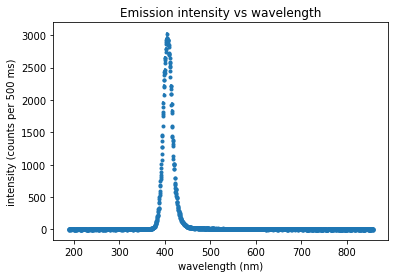

<Figure size 432x288 with 0 Axes>

In [6]:
# Import data from tab-delimited text file
# genfromtxt is just another way of doing things. you can stick to loadtxt if you like it!
#data=np.genfromtxt('LED400nm_22dec2020_500ms_5scanAvg.txt',skip_header=1,delimiter='\t')
#lambd = data[:,0] # wavelength (nm)
#intensity = data[:,1] # counts acquired in 500 ms scans, averaged over five scans

lambd, intensity = np.loadtxt('LED400nm_22dec2020_500ms_5scanAvg.txt', skiprows=1, unpack=True)
d_intensity = np.sqrt(np.abs(5*intensity))/5 # average of five scans, but we don't know the five measurements and/or stand. dev. so we will use sqrt(5*data)/5

plt.errorbar(lambd,intensity,yerr=d_intensity,fmt='.')
plt.title('Emission intensity vs wavelength')
plt.ylabel('intensity (counts per 500 ms)')
plt.xlabel('wavelength (nm)')
plt.savefig('data_LED.png')
plt.show()
plt.clf()


* Looks good!  Now load up the CSE640 data and try a Gaussian fit.  I check first with scipy.optimize to get a comparison to lmfit performance.

SciPy curve_fit best fit values [ Amp mu RMS ]:  [150.84943263 665.82373378  10.2864863 ]

Lmfit Model fitting results:


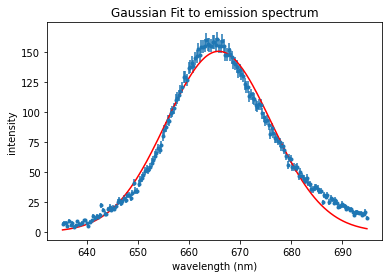

<Figure size 432x288 with 0 Axes>

In [11]:
# Import data from tab-delimited text file
lambd, intensity = np.loadtxt('red640nm_22dec2020_500ms_5scanAvg.txt', skiprows=1, unpack=True)
d_intensity = np.sqrt(np.abs(5*intensity))/5 # average of five scans
    
#Fit data to a simple gaussian, assuming dot sizes are gaussian distributed
#set seeds for fit parameters (nominal values)
Amp=175 # peak counts
mu=660 # peak mean location
RMS=10 # peak RootMeanSquare

def gauss(v,a,mean,sigma):
    return a*np.exp(-(v-mean)**2/(2*sigma**2))

##############################
# Modify fit range here!
lamMin = 635
lamMax = 695
#############################

Lambd = lambd[np.where((lambd>lamMin)&(lambd<lamMax))]
Intensity = intensity[np.where((lambd>lamMin)&(lambd<lamMax))]
D_intensity = d_intensity[np.where((lambd>lamMin)&(lambd<lamMax))]

# This is a basic fit provided by scipy.optimize, which you can use if you do not have Lmfit installed
init_vals = [Amp, mu, RMS]
best_vals, covar = curve_fit(gauss, Lambd, Intensity, p0=init_vals)
print("SciPy curve_fit best fit values [ Amp mu RMS ]: ",best_vals)

# This is Lmfit
gModel = Model(gauss)
gModel.set_param_hint('a', value=Amp, min=0, max=Inf)
gModel.set_param_hint('mean', value=mu, min=0, max=Inf)
gModel.set_param_hint('sigma', value=RMS, min=0, max=Inf)
params = gModel.make_params()
result = gModel.fit(Intensity, v=Lambd, a=Amp, mean=mu, sigma=RMS, weights = 1.0/(D_intensity))
#dely = result.eval_uncertainty(sigma=1)
#plt.fill_between(Lambd, result.best_fit-dely, result.best_fit+dely, color="#ABABAB")

### lmfit specifically requests that residuals should be pre-normalized by the uncertainties, such that when it computes the sum of squared residuals (SSR) the reported chi-square will be an accurate determination!  
### ...well, that's not quite right either.  red chi-square of 1.8 ?  
### result = gModel.fit(Intensity/D_intensity, v=Lambd, a=Amp, mean=mu, sigma=RMS)

print('')
print('Lmfit Model fitting results:')
#print(result.fit_report())               
plt.errorbar(Lambd,Intensity,yerr=D_intensity,fmt='.')
plt.plot(Lambd, result.best_fit, 'r-')
plt.title('Gaussian Fit to emission spectrum')
plt.ylabel('intensity')
plt.xlabel('wavelength (nm)')
plt.savefig('Gauss_640.png')
plt.show()
plt.clf()

# this command produces a nicely formatted summary of your fit results
result

* Lmfit and scipy best fit values are nearly identical. Will use Lmfit for all future fitting purposes. 
* Lmfit chi-square values are not calculated in a standard way - they represent what is known as the "Sum of Squared Residuals, or SSR".  Define our own custom chi-square calculator (REUSE THIS CODE BLOCK FOR EVERY EXPERIMENT!):

In [9]:
def chiSquare(modelValues,dataValues,dataErrorBars):
    "Pearson's chi-square: chiSquare(modelValues,dataValues,dataErrorBars)"
    
    chiSqTot = -99999999
    if modelValues.size != dataValues.size :
        print('Your model and data value arrays have different lengths. Please check yourself before you wreck yourself.')
        print('data length:',dataValues.size)
        print('model length:',modelValues.size)
        return chiSqTot
    elif dataErrorBars.size != dataValues.size :
        print('Your data value and error bar arrays have different lengths. Please check yourself before you wreck yourself.')
        print('data length:',dataValues.size)
        print('error bar length:',dataErrorBars.size)
        return chiSqTot
    else :
        chiSqTot = 0
    
    i = 0
    while i < dataValues.size :
        chiSq = ( ( modelValues[i]-dataValues[i]) / (dataErrorBars[i]) )**2
        chiSqTot += chiSq
        # i++ # take the blue pill
        i += 1 # take the red pill
    return chiSqTot

def reducedChiSquare(n_params,modelValues,dataValues,dataErrorBars):
    if dataValues.size > n_params :
        redChSq = chiSquare(modelValues,dataValues,dataErrorBars)/(dataValues.size-n_params)
        print('Number of data points:',dataValues.size)
        print('Number of fit parameters:',n_params)
        print('Degrees of freedom:',dataValues.size-n_params)
        return redChSq
    else :
        print('You either need to take more data, or use a simpler fit model!')
        return -9999999

* Try out that shiny new toy:

In [10]:
nParams = 3 

chi2 = chiSquare(result.best_fit,Intensity,D_intensity)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,result.best_fit,Intensity,D_intensity)
print('Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,Intensity.size-nParams))

Total chi2:  1602.7936854195343
Number of data points: 191
Number of fit parameters: 3
Degrees of freedom: 188
Reduced chi2:  8.525498326699651
Corresponding p-value:  0.0


* This is a terrible reduced $\chi^2$ value! The p-value of zero should be interpreted in the following way: "There is a 0.0% probability that a random experimental data set drawn from a true Gaussian distribution would produce a reduced $\chi^2$ greater than 8.52."  In other words, the simple Gaussian model is not a good description of our data.
* A large number of pre-defined fit models are included in lmfit.  You can also define your own custom fit functions.  See reference: https://lmfit.github.io/lmfit-py/builtin_models.html

### Now try out a Skewed Voigt Fit.  The Voigt distribution is used primarily in spectroscopy to explain data that has more than one smearing sources.  See https://reference.wolfram.com/language/ref/VoigtDistribution.html

### Our model will return a "center" fit parameter.  When the distribution is symmetric, that value corresponds to the peak wavelength.  However, when the spectral line is asymmetric, the "center" is more like "what the wavelength would have been if this distribution were not skewed".  For our purposes, we will stick to later analysis that uses the peak wavelength.


Total chi2:  233.81468028117493
Number of data points: 191
Number of fit parameters: 4
Degrees of freedom: 187
Reduced chi2:  1.2503458838565504
Corresponding p-value:  0.011371753636323811
max of curve: 157.37326464447054
 at  [665.25] nm


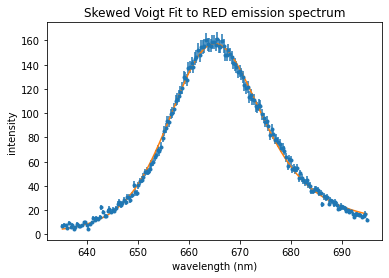

In [14]:
from lmfit.models import SkewedVoigtModel

model = SkewedVoigtModel()

# set initial parameter guesses from earlier scipy.optimize fit. add a guess for gamma (skewness)
params = model.make_params(amplitude=best_vals[0], center=best_vals[1], sigma=best_vals[2], gamma=best_vals[2])

# adjust parameters to best fit data
result = model.fit(Intensity, params, x=Lambd)

nParams = 4
chi2 = chiSquare(result.best_fit,Intensity,D_intensity)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,result.best_fit,Intensity,D_intensity)
print('Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,Intensity.size-nParams))

plt.errorbar(Lambd, Intensity,yerr=D_intensity,fmt='.')
plot(Lambd, result.best_fit) 
plt.title('Skewed Voigt Fit to RED emission spectrum')
plt.ylabel('intensity')
plt.xlabel('wavelength (nm)')
plt.savefig('skewVoigt_640.png')

# also report peak wavelength (max from fit curve)
print('max of curve:',np.max(result.best_fit))
peakLambda_red640 = Lambd[np.where(result.best_fit==np.max(result.best_fit))]
print(' at ',peakLambda_red640,'nm')

# store fit results for later use
λ640 = result.params['center'].value
σ640 = result.params['sigma'].value

result

## Reflections on the first vial data set
* We see vast(!) improvement in the reduced $\chi^2$ value using the skewed Voigt fit model!
* Before Friday's lecture, simply put, reduced $\chi^2$ should be about 1 for 'good agreement' between your fit model and your data.  This is a good rule of thumb for interpreting chi-square values for a single 'goodness of fit' question.  
* If we are comparing two or more fit models, the model with the lowest chi-square value (given the same number of fit parameters) is generally superior.  You should gain at least a reduction of 1.0 in the reduced $\chi^2$ for every additional fit parameter that you introduce... although if you had to add too many fit parameters to gain that improvement, it's not useful for a physically-motivated description or model for you data.
* Based on p-value interpretation, neither of these models represents this data well.  A "good" p-value should be around 0.5 but we will elaborate on this later.  However, as a reasonable physically-motivated model, the Skewed Voigt model does the 'best' job of the two!   

| Model for red | reduced $\chi^2$   | p-value | fit parameters |
|----------|-----------------|---------|----------------|
| Gaussian  | 8.525 | 0.000 | 3 |
| SkewVoigt | 1.250 | 0.011 | 4 |

## Next Up: 
1. We have collected data for six vials and fit the data with a reasonable model for one data set.  We need to repeat the best model fit (Skewed Voigt) for the other five data sets (no need to use Gaussian), extract the peak wavelength as lambda, and error bars on lambda.  Really, we need to account for the spread in dot sizes, which is described by either sigma or HWHM.
2. Explore the relationship between wavelength and diameter, as defined in the five models of the PreLab!  We need to plot wavelength versus dot diameter D, with accurate error bars on $\lambda$.  

## A. McGowan, DATE
## Day ? of 3
* Begin fitting the other five data samples

Total chi2:  9783.792818534308
Number of data points: 256
Number of fit parameters: 4
Degrees of freedom: 252
Reduced chi2:  38.824574676723444
Corresponding p-value:  0.0
max of curve: 3597.51112558675
 at  [658.347] nm


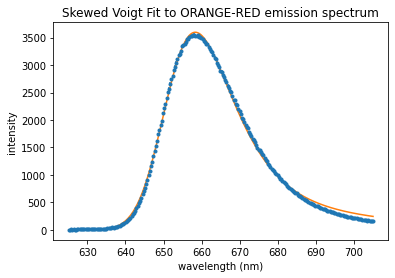

In [17]:
# Import data from tab-delimited text file
lambd, intensity = np.loadtxt('orange-red620nm_07jan2021_500ms_5scanAvg.txt', skiprows=1, unpack=True)
d_intensity = np.sqrt(np.abs(5*intensity))/5 # average of five scans

#Fit data to a simple gaussian, assuming dot sizes are gaussian distributed
#set seeds for fit parameters (nominal values)
Amp=3500 # peak counts
mu=650 # peak mean location
RMS=10 # peak RootMeanSquare

##############################
# Modify fit range here!
lamMin = 625
lamMax = 705
#############################

Lambd = lambd[np.where((lambd>lamMin)&(lambd<lamMax))]
Intensity = intensity[np.where((lambd>lamMin)&(lambd<lamMax))]
D_intensity = d_intensity[np.where((lambd>lamMin)&(lambd<lamMax))]


from lmfit.models import SkewedVoigtModel

model = SkewedVoigtModel()

# set initial parameter guesses from earlier scipy.optimize fit. add a guess for gamma (skewness)
params = model.make_params(amplitude=Amp, center=mu, sigma=RMS, gamma=RMS)

# adjust parameters to best fit data
result = model.fit(Intensity, params, x=Lambd)

nParams = 4
chi2 = chiSquare(result.best_fit,Intensity,D_intensity)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,result.best_fit,Intensity,D_intensity)
print('Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,Intensity.size-nParams))

plt.errorbar(Lambd, Intensity,yerr=D_intensity,fmt='.')
plot(Lambd, result.best_fit) 
plt.title('Skewed Voigt Fit to ORANGE-RED emission spectrum')
plt.ylabel('intensity')
plt.xlabel('wavelength (nm)')
plt.savefig('skewVoigt_620.png')

# also report peak wavelength (max from fit curve)
print('max of curve:',np.max(result.best_fit))
peakLambda_orangeRed620 = Lambd[np.where(result.best_fit==np.max(result.best_fit))]
print(' at ',peakLambda_orangeRed620,'nm')

# store fit results for later use
λ620 = result.params['center'].value
σ620 = result.params['sigma'].value

result

Total chi2:  643.6533851264952
Number of data points: 221
Number of fit parameters: 4
Degrees of freedom: 217
Reduced chi2:  2.9661446319193328
Corresponding p-value:  0.0
max of curve: 119.55767301222006
 at  [626.689] nm


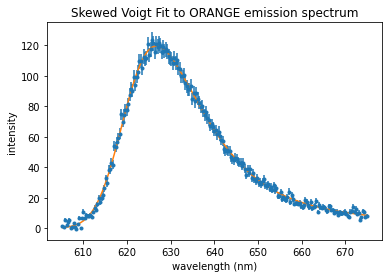

In [18]:
# Import data from tab-delimited text file
lambd, intensity = np.loadtxt('orange600nm_07jan2021_500ms_5scanAvg.txt', skiprows=1, unpack=True)
d_intensity = np.sqrt(np.abs(5*intensity))/5 # average of five scans

#Fit data to a simple gaussian, assuming dot sizes are gaussian distributed
#set seeds for fit parameters (nominal values)
Amp=3500 # peak counts
mu=650 # peak mean location
RMS=10 # peak RootMeanSquare

##############################
# Modify fit range here!
lamMin = 605
lamMax = 675
#############################

Lambd = lambd[np.where((lambd>lamMin)&(lambd<lamMax))]
Intensity = intensity[np.where((lambd>lamMin)&(lambd<lamMax))]
D_intensity = d_intensity[np.where((lambd>lamMin)&(lambd<lamMax))]


from lmfit.models import SkewedVoigtModel

model = SkewedVoigtModel()

# set initial parameter guesses from earlier scipy.optimize fit. add a guess for gamma (skewness)
params = model.make_params(amplitude=Amp, center=mu, sigma=RMS, gamma=RMS)

# adjust parameters to best fit data
result = model.fit(Intensity, params, x=Lambd)

nParams = 4
chi2 = chiSquare(result.best_fit,Intensity,D_intensity)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,result.best_fit,Intensity,D_intensity)
print('Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,Intensity.size-nParams))

plt.errorbar(Lambd, Intensity,yerr=D_intensity,fmt='.')
plot(Lambd, result.best_fit) 
plt.title('Skewed Voigt Fit to ORANGE emission spectrum')
plt.ylabel('intensity')
plt.xlabel('wavelength (nm)')
plt.savefig('skewVoigt_600.png')

# also report peak wavelength (max from fit curve)
print('max of curve:',np.max(result.best_fit))
peakLambda_orange600 = Lambd[np.where(result.best_fit==np.max(result.best_fit))]
print(' at ',peakLambda_orange600,'nm')

# store fit results for later use
λ600 = result.params['center'].value
σ600 = result.params['sigma'].value

result

Total chi2:  5054.453170621043
Number of data points: 185
Number of fit parameters: 4
Degrees of freedom: 181
Reduced chi2:  27.92515563879029
Corresponding p-value:  0.0
max of curve: 2828.2905906664223
 at  [584.875] nm


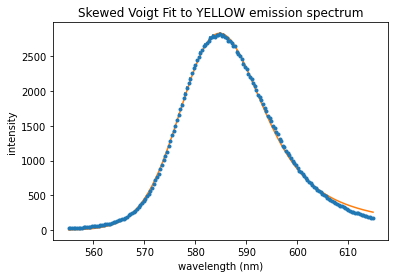

In [19]:
# Import data from tab-delimited text file
lambd, intensity = np.loadtxt('yellow560nm_07jan2021_500ms_5scanAvg.txt', skiprows=1, unpack=True)
d_intensity = np.sqrt(np.abs(5*intensity))/5 # average of five scans

#Fit data to a simple gaussian, assuming dot sizes are gaussian distributed
#set seeds for fit parameters (nominal values)
Amp=3500 # peak counts
mu=650 # peak mean location
RMS=10 # peak RootMeanSquare

##############################
# Modify fit range here!
lamMin = 555
lamMax = 615
#############################

Lambd = lambd[np.where((lambd>lamMin)&(lambd<lamMax))]
Intensity = intensity[np.where((lambd>lamMin)&(lambd<lamMax))]
D_intensity = d_intensity[np.where((lambd>lamMin)&(lambd<lamMax))]


from lmfit.models import SkewedVoigtModel

model = SkewedVoigtModel()

# set initial parameter guesses from earlier scipy.optimize fit. add a guess for gamma (skewness)
params = model.make_params(amplitude=Amp, center=mu, sigma=RMS, gamma=RMS)

# adjust parameters to best fit data
result = model.fit(Intensity, params, x=Lambd)

nParams = 4
chi2 = chiSquare(result.best_fit,Intensity,D_intensity)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,result.best_fit,Intensity,D_intensity)
print('Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,Intensity.size-nParams))

plt.errorbar(Lambd, Intensity,yerr=D_intensity,fmt='.')
plot(Lambd, result.best_fit) 
plt.title('Skewed Voigt Fit to YELLOW emission spectrum')
plt.ylabel('intensity')
plt.xlabel('wavelength (nm)')
plt.savefig('skewVoigt_560.png')

# also report peak wavelength (max from fit curve)
print('max of curve:',np.max(result.best_fit))
peakLambda_yellow560 = Lambd[np.where(result.best_fit==np.max(result.best_fit))]
print(' at ',peakLambda_yellow560,'nm')

# store fit results for later use
λ560 = result.params['center'].value
σ560 = result.params['sigma'].value

result

Total chi2:  2318.178154528378
Number of data points: 182
Number of fit parameters: 4
Degrees of freedom: 178
Reduced chi2:  13.023472778249314
Corresponding p-value:  0.0
max of curve: 1923.9523391567654
 at  [540.037] nm


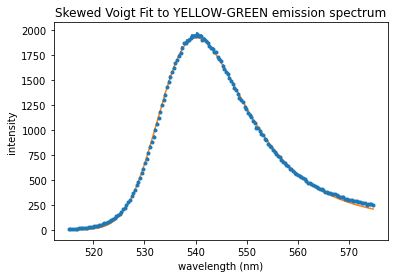

In [20]:
# Import data from tab-delimited text file
lambd, intensity = np.loadtxt('yellow-green520nm_07jan2021_500ms_5scanAvg.txt', skiprows=1, unpack=True)
d_intensity = np.sqrt(np.abs(5*intensity))/5 # average of five scans

#Fit data to a simple gaussian, assuming dot sizes are gaussian distributed
#set seeds for fit parameters (nominal values)
Amp=3500 # peak counts
mu=650 # peak mean location
RMS=10 # peak RootMeanSquare

##############################
# Modify fit range here!
lamMin = 515
lamMax = 575
#############################

Lambd = lambd[np.where((lambd>lamMin)&(lambd<lamMax))]
Intensity = intensity[np.where((lambd>lamMin)&(lambd<lamMax))]
D_intensity = d_intensity[np.where((lambd>lamMin)&(lambd<lamMax))]


from lmfit.models import SkewedVoigtModel

model = SkewedVoigtModel()

# set initial parameter guesses from earlier scipy.optimize fit. add a guess for gamma (skewness)
params = model.make_params(amplitude=Amp, center=mu, sigma=RMS, gamma=RMS)

# adjust parameters to best fit data
result = model.fit(Intensity, params, x=Lambd)

nParams = 4
chi2 = chiSquare(result.best_fit,Intensity,D_intensity)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,result.best_fit,Intensity,D_intensity)
print('Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,Intensity.size-nParams))

plt.errorbar(Lambd, Intensity,yerr=D_intensity,fmt='.')
plot(Lambd, result.best_fit) 
plt.title('Skewed Voigt Fit to YELLOW-GREEN emission spectrum')
plt.ylabel('intensity')
plt.xlabel('wavelength (nm)')
plt.savefig('skewVoigt_520.png')

# also report peak wavelength (max from fit curve)
print('max of curve:',np.max(result.best_fit))
peakLambda_yellowGreen520 = Lambd[np.where(result.best_fit==np.max(result.best_fit))]
print(' at ',peakLambda_yellowGreen520,'nm')

# store fit results for later use
λ520 = result.params['center'].value
σ520 = result.params['sigma'].value

result

Total chi2:  907.2872797974051
Number of data points: 182
Number of fit parameters: 4
Degrees of freedom: 178
Reduced chi2:  5.097119549423624
Corresponding p-value:  0.0
max of curve: 2341.1665120035595
 at  [537.065] nm


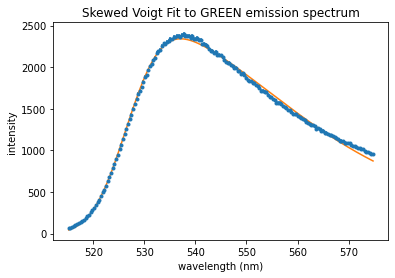

In [21]:
# Import data from tab-delimited text file
lambd, intensity = np.loadtxt('green500nm_07jan2021_500ms_5scanAvg.txt', skiprows=1, unpack=True)
d_intensity = np.sqrt(np.abs(5*intensity))/5 # average of five scans

#Fit data to a simple gaussian, assuming dot sizes are gaussian distributed
#set seeds for fit parameters (nominal values)
Amp=3500 # peak counts
mu=650 # peak mean location
RMS=10 # peak RootMeanSquare

##############################
# Modify fit range here!
lamMin = 515
lamMax = 575
#############################

Lambd = lambd[np.where((lambd>lamMin)&(lambd<lamMax))]
Intensity = intensity[np.where((lambd>lamMin)&(lambd<lamMax))]
D_intensity = d_intensity[np.where((lambd>lamMin)&(lambd<lamMax))]


from lmfit.models import SkewedVoigtModel

model = SkewedVoigtModel()

# set initial parameter guesses from earlier scipy.optimize fit. add a guess for gamma (skewness)
params = model.make_params(amplitude=Amp, center=mu, sigma=RMS, gamma=RMS)

# adjust parameters to best fit data
result = model.fit(Intensity, params, x=Lambd)

nParams = 4
chi2 = chiSquare(result.best_fit,Intensity,D_intensity)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,result.best_fit,Intensity,D_intensity)
print('Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,Intensity.size-nParams))

plt.errorbar(Lambd, Intensity,yerr=D_intensity,fmt='.')
plot(Lambd, result.best_fit) 
plt.title('Skewed Voigt Fit to GREEN emission spectrum')
plt.ylabel('intensity')
plt.xlabel('wavelength (nm)')
plt.savefig('skewVoigt_500.png')

# also report peak wavelength (max from fit curve)
print('max of curve:',np.max(result.best_fit))
peakLambda_green500 = Lambd[np.where(result.best_fit==np.max(result.best_fit))]
print(' at ',peakLambda_green500,'nm')

# store fit results for later use
λ500 = result.params['center'].value
σ500 = result.params['sigma'].value

result

## Super Key: Python dictionaries...this is how you access Lmfit parameters!

In [22]:
print(result.params['center'].value)

print('peak wavelengths, in decreasing order, all in nm')
print(peakLambda_red640)
print(peakLambda_orangeRed620)
print(peakLambda_orange600)
print(peakLambda_yellow560)
print(peakLambda_yellowGreen520)
print(peakLambda_green500)

pλ640 = peakLambda_red640
pλ620 = peakLambda_orangeRed620
pλ600 = peakLambda_orange600
pλ560 = peakLambda_yellow560
pλ520 = peakLambda_yellowGreen520
pλ500 = peakLambda_green500

526.5386024137199
peak wavelengths, in decreasing order, all in nm
[665.25]
[658.347]
[626.689]
[584.875]
[540.037]
[537.065]


### Summarize the fit parameter results (all used Skewed Voigt and describe peak region reasonably well) - no need to summarize $\chi^2$ here.
| Data Sample  | Center $\lambda$ (nm) | peak $\lambda$ (nm) | $\sigma$ (nm)    | Amplitude (normalization constant, total counts) |
|--------------|-----------------------|--------|------------------|--------------------------------------------------|
| Red          | 662.93 $\pm$ 0.17     | 665.25 |  6.24 $\pm$ 0.04 |   4566 $\pm$  16                                 |
| Orange-Red   | 650.89 $\pm$ 0.06     | 658.35 |  9.65 $\pm$ 0.07 | 109336 $\pm$ 282                                 |
| Orange       | 619.38 $\pm$ 0.06     | 626.69 | 10.39 $\pm$ 0.08 |   3652 $\pm$  13                                 |
| Yellow       | 580.43 $\pm$ 0.20     | 584.88 |  6.24 $\pm$ 0.09 |  72393 $\pm$ 184                                 |
| Yellow-Green | 533.21 $\pm$ 0.04     | 540.04 |  9.34 $\pm$ 0.05 |  54511 $\pm$ 111                                 |
| Green        | 526.54 $\pm$ 0.05     | 537.07 | 20.73 $\pm$ 0.10 | 126944 $\pm$ 355                                 |

* Note: 'center' wavelengths are defined in the fit function below and do not correspond to 'peak' or 'most probable' wavelength unless the distribution is symmetric!
<img src="skewVoigtDefn.PNG" width = "800">
* We will use sigma as our starting best estimate for error bars on center wavelengths when we construct our $\lambda$ vs. $D$ plot and fits.
### Make the wavelength vs. diameter plot
* Here are the NN-labs provided dot 'size' (diameter $D$ in nm)
<img src="dotDiameters.PNG" width = "600">

In [4]:

#import numpy to handle arrays
import numpy as np

#import matplotlib to create plots
import matplotlib.pyplot as plt

D_data = [2.3,2.6,3.3,4.6,5.6,6.9] # dot diamters (nm)
d_D_data = [0.1,0.1,0.1,0.1,0.1,0.1] # estimate NN-labs uncertainty, but isn't describing spread of size distribution
lambdas_data = [526.54,533.21,580.43,619.38,650.89,662.93]
d_lambda_data = [20.73,9.34,6.24,10.39,9.65,6.24]

D_all = np.array(D_data) # dot diamters (nm)
d_D_all = np.array(d_D_data) # estimate NN-labs uncertainty, but isn't describing spread of size distribution
lambdas_all = np.array(lambdas_data)
d_lambda_all = np.array(d_lambda_data)
peak_lambdas_all = np.array([peakLambda_green500,peakLambda_yellowGreen520,peakLambda_yellow560,peakLambda_orange600,peakLambda_orangeRed620,peakLambda_red640])

##############################
# Modify fit range here, in nm
dMin = 1
dMax = 10

D = D_all[np.where((D_all>dMin)&(D_all<dMax))]
d_D = d_D_all[np.where((D_all>dMin)&(D_all<dMax))]
lambdas = lambdas_all[np.where((D_all>dMin)&(D_all<dMax))]
d_lambda = d_lambda_all[np.where((D_all>dMin)&(D_all<dMax))]
peak_lambdas = peak_lambdas_all[np.where((D_all>dMin)&(D_all<dMax))]
##############################

# define semiconductor properties of CdSe, in base SI units
E_g = 1.74 * e# converted to J from eV
me = 0.13*m_e
print('Effective electron mass:',me,'kg')
mh = 0.45*m_e
print('Effective hole mass:',mh,'kg')
print('E_g:',E_g,'J')

plt.errorbar(D, lambdas,yerr=d_lambda,fmt='.',label='center $\lambda$') 
plt.errorbar(D, peak_lambdas,yerr=d_lambda,fmt='.',label='peak $\lambda$') 
plt.title('Emitted photon wavelength vs. quantum dot diameter')
plt.ylabel('$\lambda$ (nm)')
plt.xlabel('D (nm)')
plt.legend()
plt.savefig('dot_lambda_vs_D.png')

NameError: name 'peakLambda_green500' is not defined

### We will use peak wavelength for our comparison to the PreLab models, but you can see they do not differ much from the 'center' wavelength given by the Skewed Voigt fit. 

### Keep in mind that we are not fitting our models to this diameter data!  All parameters in our PreLab models are fixed by the physical theory, so we must simply plot each model and compute $\chi^2$ agreement with our data.  Then we can select the best model by comparing the $\chi^2$ values.

In [2]:
# define reduced mass of electron-hole system
mu = (me*mh)/(me+mh)

# define each model from our PreLab theory work.  Each mN is a function lambda(D)
def m1(d):
    return (8 * m_e * c * (d*1e-9)**2 / h) *1e9 # convert to nm

def m2(d):
    return (8/3 * m_e * c * (d*1e-9)**2 / h) *1e9 # convert to nm

def m3(d):
    return (h * c / (E_g +(3 * h**2 / (8 * m_e * (d*1e-9)**2) ))) *1e9 # convert to nm

def m4(d):
    return (h * c / (E_g +(  h**2 / (2 * m_e * (d*1e-9)**2) ))) *1e9 # convert to nm

def m5(d):
    return (h * c / (E_g + (h**2 / (2 * mu  * (d*1e-9)**2) ))) *1e9 # convert to nm

# model from "ESI The Owner Societies 2013" adds exciton binding energy.  Shows wacky ~few micron for the largest 3, 
#  and is crazy for the smallest three dots, where the binding energy becomes larger than the other two terms, 
#  causing negative wavelengths!
#def m6(d):
#    E_binding = 1.8*e**2/(6.2*epsilon_0)/(d/2*1e-9)
#    return (h * c / (E_g - E_binding + ((h**2 / (2*(d*1e-9)**2)) * (me+mh)/(me*mh)))) *1e9 # convert to nm

chi2 = chiSquare(m1(D),lambdas,d_lambda)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,m1(D),lambdas,d_lambda)
print('m1 Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,m1(D).size-nParams))

chi2 = chiSquare(m2(D),lambdas,d_lambda)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,m2(D),lambdas,d_lambda)
print('m2 Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,m2(D).size-nParams))

plt.errorbar(D, lambdas,yerr=d_lambda,fmt='.',label='data')
plot(D, m1(D),label='m1')
plot(D, m2(D),label='m2')
plot(D, m3(D),label='m3')
plt.title('Emitted photon wavelength vs. quantum dot diameter')
plt.ylabel('$\lambda$ (nm)')
plt.xlabel('D (nm)')
plt.legend()
plt.savefig('CdSe_dotModel.png')

NameError: name 'me' is not defined

### Clearly, the first two models (infinite wells in vacuum) are garbage.  Let's compare models 3, 4, and 5:

In [1]:
# choose model to compute agreement with data
model = m3
nParams = 0

chi2 = chiSquare(m3(D),lambdas,d_lambda)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,m3(D),lambdas,d_lambda)
print('m3 Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,m3(D).size-nParams))

chi2 = chiSquare(m4(D),lambdas,d_lambda)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,m4(D),lambdas,d_lambda)
print('m4 Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,m4(D).size-nParams))

chi2 = chiSquare(m5(D),lambdas,d_lambda)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,m5(D),lambdas,d_lambda)
print('m5 Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,m5(D).size-nParams))

plt.errorbar(D, lambdas,yerr=d_lambda,fmt='.',label='data')
plot(D, m3(D),label='m3')
plot(D, m4(D),label='m4')
plot(D, m5(D),label='m5')
#plot(D, m6(D),label='m6')
plt.title('Emitted photon wavelength vs. quantum dot diameter')
plt.ylabel('$\lambda$ (nm)')
plt.xlabel('D (nm)')
plt.legend()
plt.savefig('CdSe_dotModel.png')

NameError: name 'm3' is not defined

### The most complete model 5 (includes the kinetic energy of the free electron-hole pair) does not give good agreement for these CdSe dots.  Model 4 (simple spherical semiconductor dots) has the best reduced chi-square.

### Check Model 5 against our old data from a different manufacturer and different semiconductor, Indium-Phosphide (InP) dots.


Effective electron mass: 7.2875069612e-32 kg
Effective hole mass: 5.4656302209e-31 kg
E_g: 2.153325396096e-19 J
mu: 6.430153201058824e-32
lambda data [529 568 598 623] nm
model fit [230.795015   275.75780043 375.63092354 527.3652093  612.72869944
 692.04567007] nm
Total chi2:  0.19242849972868775
Number of data points: 4
Number of fit parameters: 0
Degrees of freedom: 4
Reduced chi2:  0.04810712493217194
Corresponding p-value:  0.9956578574891304


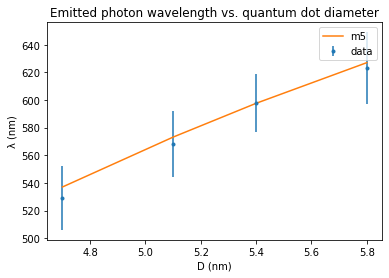

In [28]:
# uses my InP 2014 data for emission spectra, and CENCO provided dot diameters
D_inp = np.array([4.7,5.1,5.4,5.8]) # dot diamters (nm)
d_D_inp = np.array([0.1,0.1,0.1,0.1]) # estimate manufacturer uncertainty, but isn't describing spread of size distribution
λs_inp = np.array([529,568,598,623])
d_λ_inp = np.array([23,24,21,26])

##############################
# Modify fit range here, in nm
dMin = 1
dMax = 10

D_InP = D_inp[np.where((D_inp>dMin)&(D_inp<dMax))]
d_D = d_D_inp[np.where((D_inp>dMin)&(D_inp<dMax))]
λs = λs_inp[np.where((D_inp>dMin)&(D_inp<dMax))]
d_λ = d_λ_inp[np.where((D_inp>dMin)&(D_inp<dMax))]
##############################

# define semiconductor properties of InP, in base SI units
E_g_inp = 1.344 * e# converted to J from eV
me_inp = 0.080*m_e
print('Effective electron mass:',me_inp,'kg')
mh_inp = 0.60*m_e
print('Effective hole mass:',mh_inp,'kg')
print('E_g:',E_g_inp,'J')

# define reduced mass of electron-hole system
mu_inp = (me_inp*mh_inp)/(me_inp+mh_inp)
print('mu:',mu_inp)

## Must re-compute the model predictions for InP!
# define each model from our PreLab theory work.  Each mN is a function lambda(D)
def m1_inp(d):
    return (8 * m_e * c * (d*1e-9)**2 / h) *1e9 # convert to nm

def m2_inp(d):
    return (8/3 * m_e * c * (d*1e-9)**2 / h) *1e9 # convert to nm

def m3_inp(d):
    return (h * c / (E_g_inp +(3 * h**2 / (8 * m_e * (d*1e-9)**2) ))) *1e9 # convert to nm

def m4_inp(d):
    return (h * c / (E_g_inp +(  h**2 / (2 * m_e * (d*1e-9)**2) ))) *1e9 # convert to nm

def m5_inp(d):
    return (h * c / (E_g_inp + (h**2 / (2 * mu_inp  * (d*1e-9)**2) ))) *1e9 # convert to nm

# model from "ESI The Owner Societies 2013" adds exciton binding energy.  Shows wacky ~few micron for the largest 3, 
#  and is crazy for the smallest three dots, where the binding energy becomes larger than the other two terms, 
#  causing negative wavelengths!
def m6_inp(d):
    E_binding = 1.8*e**2/(6.2*epsilon_0)/(d/2*1e-9)
    return (h * c / (E_g_inp - E_binding + (h**2 / (2*mu_inp*(d*1e-9)**2)))) *1e9 # convert to nm

# choose model to compute agreement with data
model = m5_inp
nParams = 0

print('lambda data',λs,'nm')
print('model fit',model(D),'nm')

chi2 = chiSquare(model(D_InP),λs,d_λ)
print('Total chi2: ',chi2)
redChi2 = reducedChiSquare(nParams,model(D_InP),λs,d_λ)
print('Reduced chi2: ',redChi2)
print('Corresponding p-value: ',1.000-sp.stats.chi2.cdf(chi2,model(D_InP).size-nParams))

plt.errorbar(D_InP, λs,yerr=d_λ,fmt='.',label='data')
#plot(D, m1_inp(D),label='m1')
#plot(D, m2_inp(D),label='m2')
#plot(D, m3_inp(D),label='m3')
#plot(D, m4_inp(D),label='m4')
plot(D_InP, m5_inp(D_InP),label='m5')
#plot(D_InP, m6_inp(D_InP),label='m6')
plt.title('Emitted photon wavelength vs. quantum dot diameter')
plt.ylabel('λ (nm)')
plt.xlabel('D (nm)')
plt.legend()
plt.savefig('InP_dotModel.png')

### Clearly, Model 5 does a better job of describing the InP quantum dot spectra than the CdSe.  It is likely that their exciton Bohr radii are significantly smaller than their dot radii.  Perhaps the electron and hole are essentially 'free' in the larger InP dots.

### But, at least Model 5 is closer to the CdSe behavior for the largest of the dots, which are larger than the exciton Bohr radius...need to look up those values for both CdSe and InP...

## A. McGowan, DATE

### Experiment section

* Qualitatively, which of the vials is showing the highest energy emission?



* Which of the vials has the smallest particles? 



* What physical principal allows you to predict these answers without taking any data?



### Analysis section

* Does one emission spectra model fit all of the samples well?



* Do all samples have the same overall photon rate (intensity of emission)? If not, what factor(s) do you believe could be causing differences?



* Using a reasonable estimate for the variation in wavelengths, determine the variation in dot diameters for each sample. Do all samples have the same variation?


In [29]:
# invert the wavelength-diameter relationship for model 5

def diameterRange_m5(peakLambda,sigma):
    minλ = (peakLambda-sigma)*1e-9
    maxλ = (peakLambda+sigma)*1e-9
    #print(minλ)
    minD = 1e9 * minλ * h**2 / (2 * mu * (h * c - minλ * E_g))
    #print(minD)
    maxD = 1e9 * maxλ * h**2 / (2 * mu * (h * c - maxλ * E_g))
    #print(maxD)
    return minD,maxD
    
peakλs = np.array([float(pλ640),float(pλ620),float(pλ600),float(pλ560),float(pλ520),float(pλ500)])
sigmas = np.array([σ640,σ620,σ600,σ560,σ520,σ500])

minDiameters,maxDiameters = diameterRange_m5(peakλs,sigmas)
print(minDiameters)
print(maxDiameters)
print('Diameter ranges (in m):',maxDiameters-minDiameters)

[1.05487976e-07 8.70632270e-08 5.48724895e-08 3.70307097e-08
 2.50112145e-08 2.25533939e-08]
[1.40147998e-07 1.28496631e-07 7.23489252e-08 4.17189994e-08
 2.88542267e-08 3.08895651e-08]
Diameter ranges (in m): [3.46600228e-08 4.14334043e-08 1.74764357e-08 4.68828973e-09
 3.84301228e-09 8.33617122e-09]


### Follow-up Questions

1. What other factor(s), in addition to size variations, might cause the spread in emitted wavelengths?



2. Determine if we could ever observe n = 2 to n = 0 photon emissions in this experiment, given our measured UV LED wavelength. Show your calculations!



3. Why do you think that our data agree with the dot size model better at larger dot sizes? If there is a 'natural' exciton Bohr radius for each bulk semiconductor, and you confine an exciton to a region smaller than it would naturally occupy in bulk material, what do you think the consequence would be? Will the emitted photon energy be larger or smaller than predicted by our model?



In [30]:
def m5_n2(d):
    return (h * c / (E_g + (2* h**2 / (mu  * (d*1e-9)**2) ))) *1e9 # convert to nm

print(D)
print(m5_n2(D))

[2.3 2.6 3.3 4.6 5.6 6.9]
[ 95.25445294 117.36423616 171.78138925 271.95324173 340.41732614
 414.26099869]
